In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kashishtomar11","key":"0bd342e0710795aed72d69be6e19e19a"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d lethereal/food101
!unzip -o food101.zip -d /content/food101

Streaming output truncated to the last 5000 lines.
  inflating: /content/food101/food-101/images/tacos/1030289.jpg  
  inflating: /content/food101/food-101/images/tacos/1033196.jpg  
  inflating: /content/food101/food-101/images/tacos/1036030.jpg  
  inflating: /content/food101/food-101/images/tacos/1042175.jpg  
  inflating: /content/food101/food-101/images/tacos/1044043.jpg  
  inflating: /content/food101/food-101/images/tacos/1058697.jpg  
  inflating: /content/food101/food-101/images/tacos/1059239.jpg  
  inflating: /content/food101/food-101/images/tacos/1059326.jpg  
  inflating: /content/food101/food-101/images/tacos/1066762.jpg  
  inflating: /content/food101/food-101/images/tacos/1070967.jpg  
  inflating: /content/food101/food-101/images/tacos/1073468.jpg  
  inflating: /content/food101/food-101/images/tacos/1075296.jpg  
  inflating: /content/food101/food-101/images/tacos/1085243.jpg  
  inflating: /content/food101/food-101/images/tacos/108529.jpg  
  inflating: /content/food

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
data_path = "/content/food101/food-101/images"  # Fixed path for lethereal version
print("Food classes:", len(os.listdir(data_path)))

Food classes: 101


In [6]:
img_size = 128
X, y = [], []
labels = sorted(os.listdir(data_path))
selected_labels = labels[:30]  # Limit to first 30 classes
label_map = {label: idx for idx, label in enumerate(selected_labels)}

for label in selected_labels:
    folder = os.path.join(data_path, label)
    count = 0
    for img_file in os.listdir(folder):
        if img_file.endswith(".jpg") and count < 100:
            img_path = os.path.join(folder, img_file)
            img = Image.open(img_path).resize((img_size, img_size)).convert("RGB")
            X.append(np.array(img) / 255.0)
            y.append(label_map[label])
            count += 1

X = np.array(X)
y = to_categorical(np.array(y), num_classes=len(label_map))

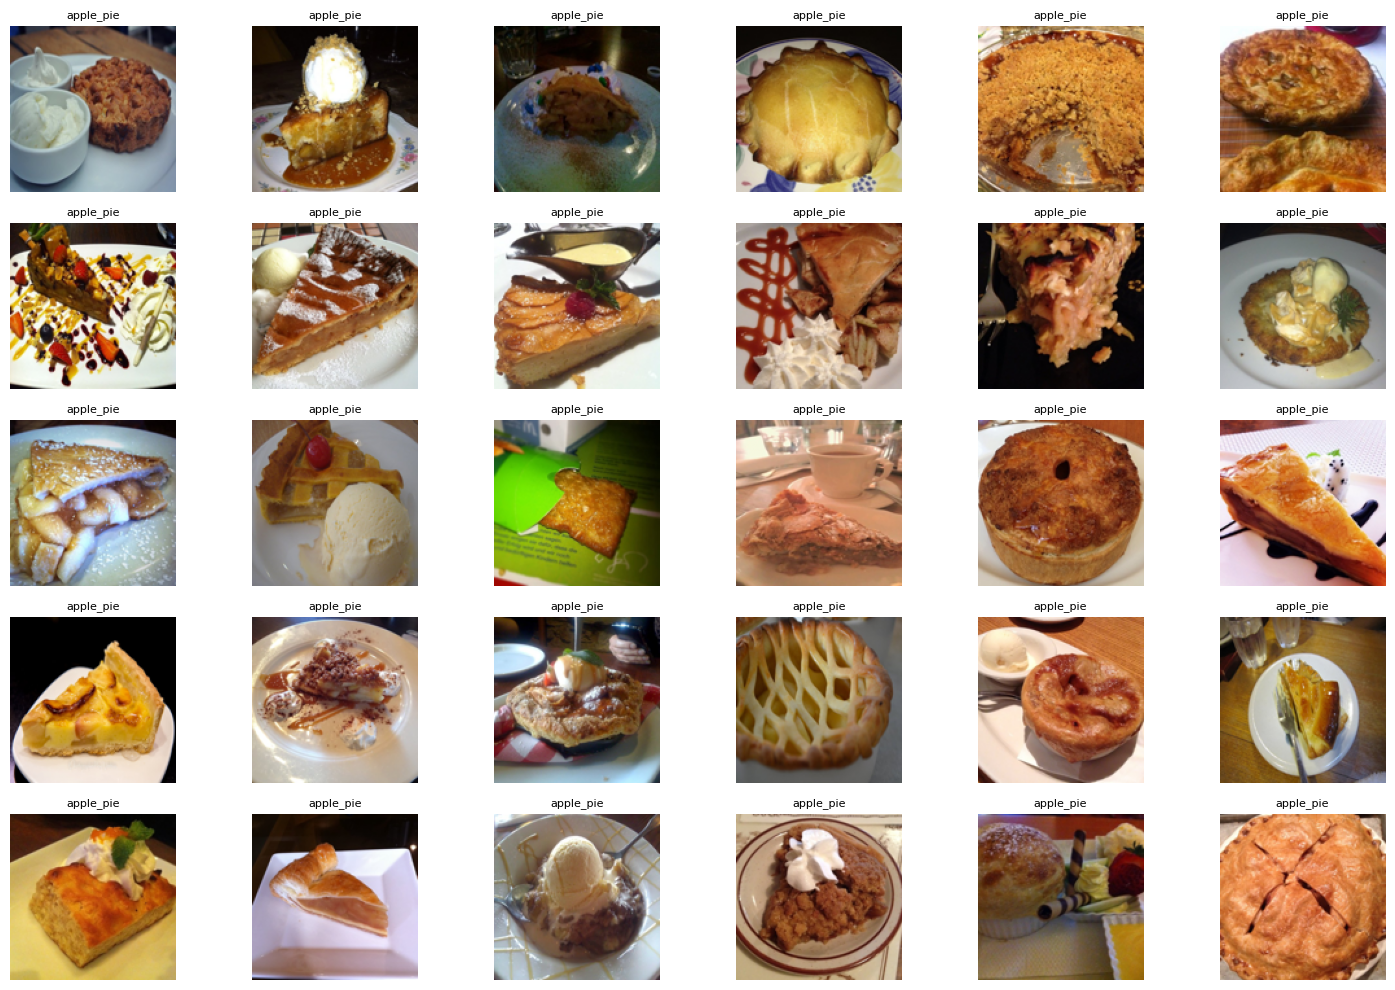

In [7]:
plt.figure(figsize=(15, 10))
for i in range(30):
    plt.subplot(5, 6, i+1)
    plt.imshow(X[i])
    label_idx = np.argmax(y[i])
    label_name = list(label_map.keys())[list(label_map.values()).index(label_idx)]
    plt.title(label_name, fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(label_map), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,396,190 (28.21 MB)

 Trainable params: 7,396,190 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 65s 842ms/step - accuracy: 0.0330 - loss: 3.8575 - val_accuracy: 0.0467 - val_loss: 3.3938
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 831ms/step - accuracy: 0.0592 - loss: 3.3602 - val_accuracy: 0.0900 - val_loss: 3.3131
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 61s 808ms/step - accuracy: 0.1478 - loss: 3.1193 - val_accuracy: 0.1250 - val_loss: 3.2200
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 62s 829ms/step - accuracy: 0.3165 - loss: 2.4650 - val_accuracy: 0.1283 - val_loss: 3.2759
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 800ms/step - accuracy: 0.5637 - loss: 1.5335 - val_accuracy: 0.1183 - val_loss: 3.6903
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 820ms/step - accuracy: 0.7765 - loss: 0.8259 - val_accuracy: 0.0967 - val_loss: 4.2925
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 812ms/step - accuracy: 0.8750 - loss: 0.4851 - val_accuracy: 0.1017 - val_loss: 4.7153
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 84s 845ms/step - accuracy: 0.9164 - loss: 0.3149 - val_accu

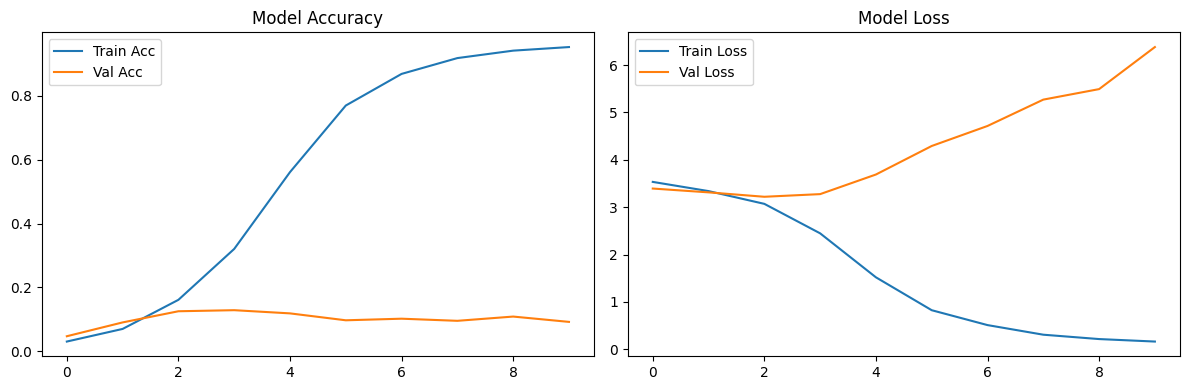

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
calorie_map = {
    'apple_pie': 296,
    'baby_back_ribs': 320,
    'baklava': 430,
    'beef_carpaccio': 250,
    'beef_tartare': 215,
    'beet_salad': 150,
    'beignets': 390,
    'bibimbap': 490,
    'bread_pudding': 310,
    'breakfast_burrito': 500,
    'bruschetta': 170,
    'caesar_salad': 180,
    'cheesecake': 430,
    'chicken_curry': 290,
    'churros': 420
}

In [17]:
def predict_food(img_array):
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_idx = np.argmax(prediction)
    predicted_label = list(label_map.keys())[list(label_map.values()).index(predicted_idx)]
    calories = calorie_map.get(predicted_label, "Not available")
    if calories == "Not available":
        print(f"⚠️ Calorie info not found for: {predicted_label}")
    return predicted_label, calories

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


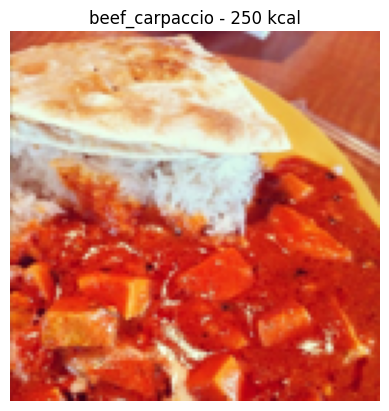

In [18]:
sample_image = X_test[0]
predicted_food, est_calories = predict_food(sample_image)

plt.imshow(sample_image)
plt.title(f"{predicted_food} - {est_calories} kcal")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
⚠️ Calorie info not found for: chicken_wings
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
⚠️ Calorie info not found for: croque_madame
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
⚠️ Calorie info not found for: cup_cakes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
⚠️ Calorie info not found for: club_sandwich


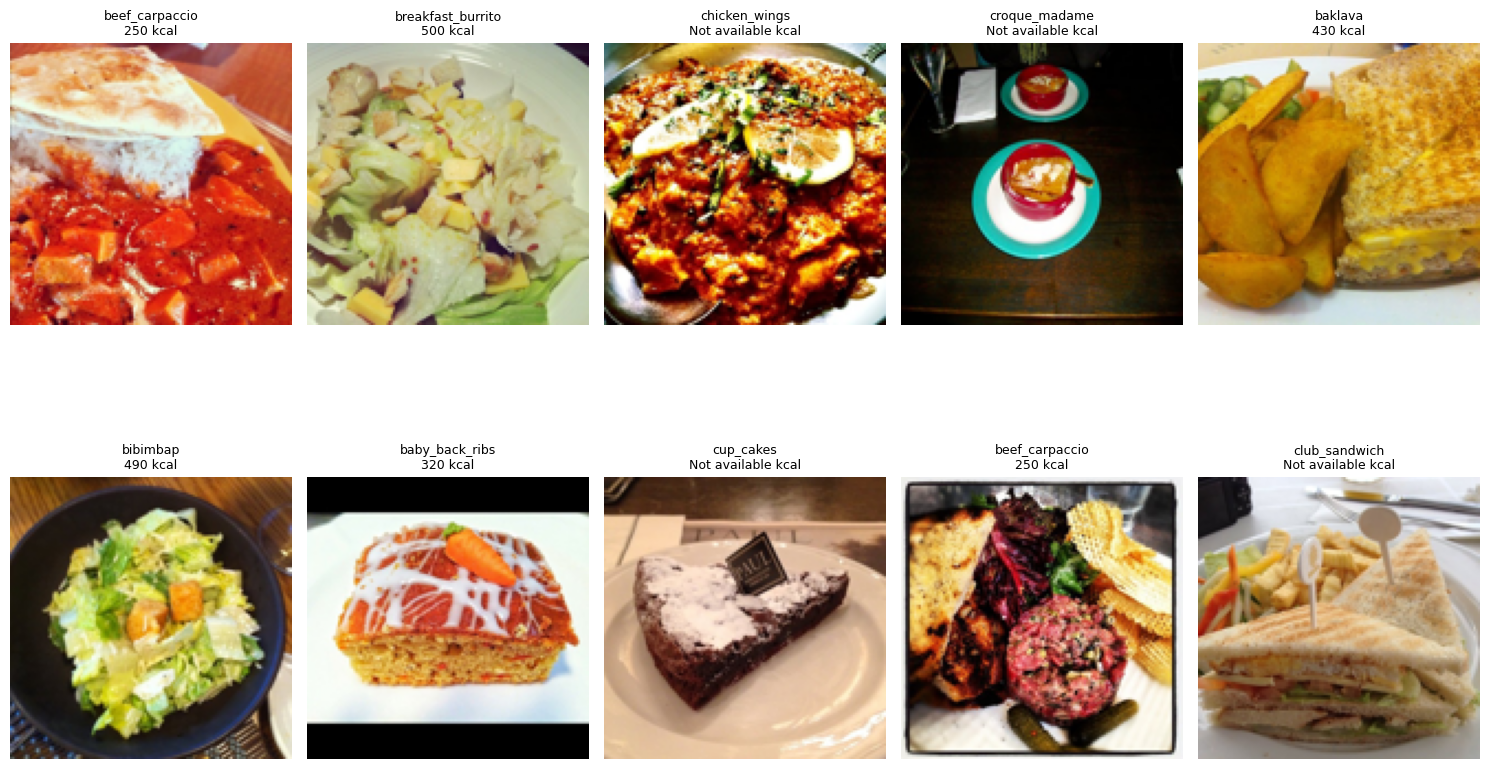

In [19]:
# 🍱 Step 11: Show 10 Predictions with Calorie Estimations
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample_image = X_test[i]
    predicted_food, est_calories = predict_food(sample_image)
    plt.imshow(sample_image)
    plt.title(f"{predicted_food}\n{est_calories} kcal", fontsize=9)
    plt.axis("off")
plt.tight_layout()
plt.show()